# Proyecto S10 Decisiones de Negocio Basadas en Datos

## Introducción 

Para este proyecto, soy un analista en una gran tienda online. Junto con el departamento de marketing hemos recopilado una lista de hipótesis que pueden ayudar a aumentar los ingresos.

Tenemos que priorizar estas hipótesis, lanzar un test A/B y analizar los resultados.

Para poder tomar una decisión basada en los resultados de la prueba. Las decisiones posibles son: 1. Parar la prueba, considerar a uno de los grupos como líder. 2. Parar la prueba, concluir que no hay diferencia entre los grupos. 3. Continuar la prueba.

Comentario para los revisores: buenas noches, una disculpa pero no se que ha estado pasando con la plataforma, ya he subido dos veces mi proyecto completo y las dos veces solo se guarda la versión incompleta, de antemano una disculpa por los inconvenientes. Espero que ahora sí puedan ver la versión completa junto con este comentario

## librerías 


In [1]:
# Cargar librerías necesarias
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

## Datos 

In [2]:
hypotheses_data = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')

orders = pd.read_csv('/datasets/orders_us.csv')

visits = pd.read_csv('/datasets/visits_us.csv')

## Exploración inicial 

In [3]:
print(hypotheses_data.head(10))


                                          Hypothesis  Reach  Impact  \
0  Add two new channels for attracting traffic. T...      3      10   
1  Launch your own delivery service. This will sh...      2       5   
2  Add product recommendation blocks to the store...      8       3   
3  Change the category structure. This will incre...      8       3   
4  Change the background color on the main page. ...      3       1   
5  Add a customer review page. This will increase...      3       2   
6  Show banners with current offers and sales on ...      5       3   
7  Add a subscription form to all the main pages....     10       7   
8  Launch a promotion that gives users discounts ...      1       9   

   Confidence  Effort  
0           8       6  
1           4      10  
2           7       3  
3           3       8  
4           1       1  
5           2       3  
6           8       3  
7           8       5  
8           9       5  


In [4]:
print(orders.head(10))

   transactionId   visitorId        date  revenue group
0     3667963787  3312258926  2019-08-15     30.4     B
1     2804400009  3642806036  2019-08-15     15.2     B
2     2961555356  4069496402  2019-08-15     10.2     A
3     3797467345  1196621759  2019-08-15    155.1     B
4     2282983706  2322279887  2019-08-15     40.5     B
5      182168103   935554773  2019-08-15     35.0     B
6      398296753  2900797465  2019-08-15     30.6     B
7     2626614568    78758296  2019-08-15     20.1     A
8     1576988021   295230930  2019-08-15    215.9     A
9     1506739906  1882260405  2019-08-15     30.5     B


In [5]:
print(visits.head(10))

         date group  visits
0  2019-08-01     A     719
1  2019-08-02     A     619
2  2019-08-03     A     507
3  2019-08-04     A     717
4  2019-08-05     A     756
5  2019-08-06     A     667
6  2019-08-07     A     644
7  2019-08-08     A     610
8  2019-08-09     A     617
9  2019-08-10     A     406


In [6]:
print(hypotheses_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None


In [7]:
print(orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB
None


In [8]:
print(visits.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None


## Correcciones

In [9]:
# Convertir la columna 'date' a formato datetime en orders y visits
orders['date'] = pd.to_datetime(orders['date'])
visits['date'] = pd.to_datetime(visits['date'])

# Verificar duplicados en orders y visits
orders_duplicates = orders.duplicated().sum()
visits_duplicates = visits.duplicated().sum()

print(f"Duplicados en orders: {orders_duplicates}")
print(f"Duplicados en visits: {visits_duplicates}")

Duplicados en orders: 0
Duplicados en visits: 0


In [10]:
print(orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB
None


In [11]:
print(visits.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB
None


In [12]:
# Contar cuántas veces aparece cada visitante en distintos grupos
visitor_groups = orders.groupby('visitorId')['group'].nunique()

# Filtrar los visitantes que aparecen en más de un grupo
visitors_in_both_groups = visitor_groups[visitor_groups > 1].index

# Mostrar cuántos visitantes están en ambos grupos
print(f"Número de visitantes en ambos grupos: {len(visitors_in_both_groups)}")

# Opcional: Mostrar los primeros 10 visitantes afectados
print("\nEjemplo de visitantes en ambos grupos:")
print(visitors_in_both_groups[:10])

Número de visitantes en ambos grupos: 58

Ejemplo de visitantes en ambos grupos:
Int64Index([  8300375, 199603092, 232979603, 237748145, 276558944, 351125977,
            393266494, 457167155, 471551937, 477780734],
           dtype='int64', name='visitorId')


In [13]:
# Filtrar el dataset para eliminar los visitantes que están en ambos grupos
orders_clean = orders[~orders['visitorId'].isin(visitors_in_both_groups)].copy()

# Verificar que la limpieza fue exitosa
print(f"Número de filas antes de limpiar: {len(orders)}")
print(f"Número de filas después de limpiar: {len(orders_clean)}")


Número de filas antes de limpiar: 1197
Número de filas después de limpiar: 1016


## Análisis Parte 1. Priorizar hipótesis

In [14]:
# Calcular la puntuación ICE
hypotheses_data['ICE Score'] = (hypotheses_data['Impact'] * hypotheses_data['Confidence']) / hypotheses_data['Effort']

# Ordenar las hipótesis de mayor a menor puntaje ICE
hypotheses_ice = hypotheses_data.sort_values(by='ICE Score', ascending=False)

In [15]:
print(hypotheses_ice)

                                          Hypothesis  Reach  Impact  \
8  Launch a promotion that gives users discounts ...      1       9   
0  Add two new channels for attracting traffic. T...      3      10   
7  Add a subscription form to all the main pages....     10       7   
6  Show banners with current offers and sales on ...      5       3   
2  Add product recommendation blocks to the store...      8       3   
1  Launch your own delivery service. This will sh...      2       5   
5  Add a customer review page. This will increase...      3       2   
3  Change the category structure. This will incre...      8       3   
4  Change the background color on the main page. ...      3       1   

   Confidence  Effort  ICE Score  
8           9       5  16.200000  
0           8       6  13.333333  
7           8       5  11.200000  
6           8       3   8.000000  
2           7       3   7.000000  
1           4      10   2.000000  
5           2       3   1.333333  
3        

In [16]:
# Calcular la puntuación RICE
hypotheses_data['RICE Score'] = (hypotheses_data['Reach'] * hypotheses_data['Impact'] * hypotheses_data['Confidence']) / hypotheses_data['Effort']

# Ordenar las hipótesis de mayor a menor puntaje RICE
hypotheses_rice = hypotheses_data.sort_values(by='RICE Score', ascending=False)

In [17]:
print(hypotheses_rice)

                                          Hypothesis  Reach  Impact  \
7  Add a subscription form to all the main pages....     10       7   
2  Add product recommendation blocks to the store...      8       3   
0  Add two new channels for attracting traffic. T...      3      10   
6  Show banners with current offers and sales on ...      5       3   
8  Launch a promotion that gives users discounts ...      1       9   
3  Change the category structure. This will incre...      8       3   
1  Launch your own delivery service. This will sh...      2       5   
5  Add a customer review page. This will increase...      3       2   
4  Change the background color on the main page. ...      3       1   

   Confidence  Effort  ICE Score  RICE Score  
7           8       5  11.200000       112.0  
2           7       3   7.000000        56.0  
0           8       6  13.333333        40.0  
6           8       3   8.000000        40.0  
8           9       5  16.200000        16.2  
3      

### Explicación de los cambios y selección 

Explicación de los cambios

ICE solo considera impacto, confianza y esfuerzo, por lo que prioriza hipótesis con alto impacto y confianza, pero ignora a cuántos usuarios afectará.

Ejemplo: "Launch a promotion that gives users discounts on their birthdays" tenía la puntuación más alta en ICE porque tenía alto impacto (9) y confianza (9) con un esfuerzo relativamente bajo.
RICE introduce Reach (Alcance), que cambia la priorización.

Las hipótesis que afectan a más usuarios suben en el ranking.
Ejemplo: "Add a subscription form to all the main pages" subió al primer lugar porque su alcance es 10, lo que amplifica su impacto total en comparación con otras hipótesis.
Otras hipótesis como "Show banners with offers and sales" también ganaron prioridad porque llegan a una audiencia mayor.

Por estos motivos y tomando en cuenta ambas evaluaciones considero que si solo pudiera elegir una de esas hipótesis para probar optaría por recomendar elegir la 7 "Add a subscription form to all the main pages. This will help you compile a mailing list", ya que cuanta con buenos scores en ambas evaluaciones (con buenas calificaciones en todos los rubros sobre todo manteniendo un excelente ratio entre reach y effort) y a nivel estrategico abre nuevas posbilidades de retargeting al compilar lista de emails y poderles mandar promociones, mensajes, contenidos, et. a nuestros usuarios y clientes. 

## Análisis Parte 2. Análisis del test A/B


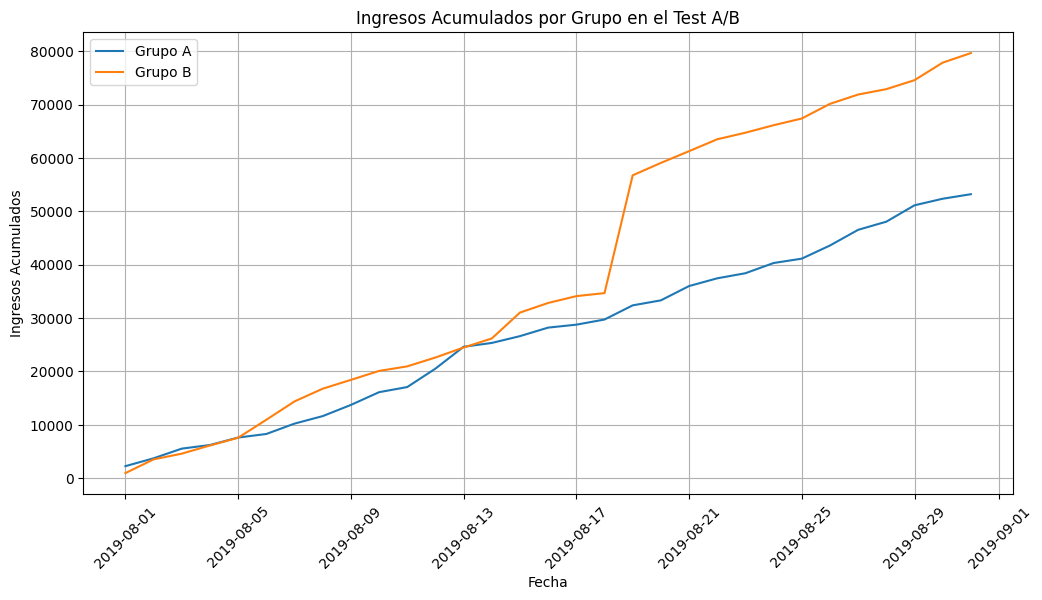

In [18]:
## calcular y graficar los ingresos acumulados

# Calcular el ingreso acumulado por grupo
cumulative_revenue = orders_clean.groupby(['date', 'group'])['revenue'].sum().groupby(level=1).cumsum().reset_index()

# Crear gráfico de ingresos acumulados
plt.figure(figsize=(12, 6))

# Graficar ingresos acumulados por grupo
for group in cumulative_revenue['group'].unique():
    group_data = cumulative_revenue[cumulative_revenue['group'] == group]
    plt.plot(group_data['date'], group_data['revenue'], label=f'Grupo {group}')

# Configurar etiquetas y título
plt.xlabel('Fecha')
plt.ylabel('Ingresos Acumulados')
plt.title('Ingresos Acumulados por Grupo en el Test A/B')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

# Mostrar gráfico
plt.show()

Observaciones

El Grupo B generó más ingresos acumulados que el Grupo A

A lo largo del experimento, el Grupo B muestra una tendencia de ingresos más alta.
Esto sugiere que la hipótesis probada en el Grupo B podría estar generando un impacto positivo.
Se observa un crecimiento estable en ambos grupos, pero con un salto abrupto en el Grupo B

Hasta la mitad del experimento, los ingresos acumulados de ambos grupos crecían de manera similar.
A partir de un punto en el tiempo (alrededor del 17-18 de agosto), el Grupo B muestra un aumento abrupto en ingresos.
Esto puede ser resultado de factores externos, como una promoción puntual, un error en la segmentación o incluso usuarios de alto gasto.

Si el salto en ingresos fue causado por anomalías o por unos pocos usuarios de alto gasto, el resultado podría no ser representativo.
Podemos verificar si el aumento provino de pocos usuarios con compras muy grandes

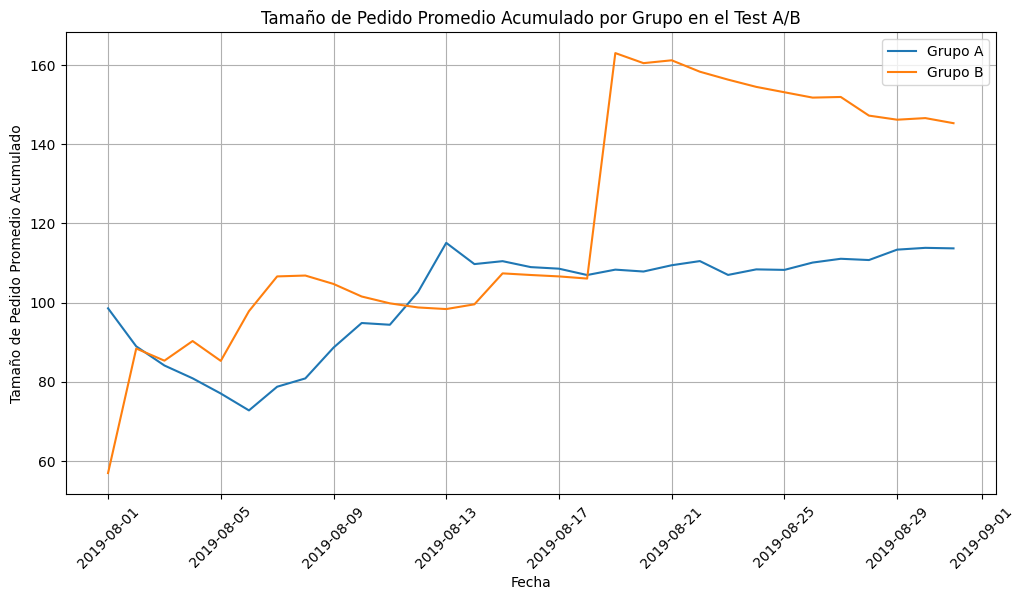

In [19]:
## calcular y graficar el tamaño de pedido promedio acumulado por grupo

# Calcular el ingreso acumulado y número de pedidos acumulados por grupo
cumulative_revenue = orders_clean.groupby(['date', 'group'])['revenue'].sum().groupby(level=1).cumsum()
cumulative_orders = orders_clean.groupby(['date', 'group'])['transactionId'].count().groupby(level=1).cumsum()

# Crear un nuevo DataFrame con los datos correctos
cumulative_avg_order = (cumulative_revenue / cumulative_orders).reset_index()
cumulative_avg_order.rename(columns={0: 'cumulative_avg_order'}, inplace=True)  # Renombrar para evitar confusión

# Crear gráfico del tamaño de pedido promedio acumulado por grupo
plt.figure(figsize=(12, 6))

# Graficar por grupo
for group in cumulative_avg_order['group'].unique():
    group_data = cumulative_avg_order[cumulative_avg_order['group'] == group]
    plt.plot(group_data['date'], group_data['cumulative_avg_order'], label=f'Grupo {group}')

# Configuración del gráfico
plt.xlabel('Fecha')
plt.ylabel('Tamaño de Pedido Promedio Acumulado')
plt.title('Tamaño de Pedido Promedio Acumulado por Grupo en el Test A/B')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

# Mostrar gráfico
plt.show()

Observaciones

Variabilidad en la primera mitad del experimento
Durante los primeros días, ambos grupos muestran fluctuaciones en el tamaño de pedido promedio.
Esto sugiere que los usuarios tenían un comportamiento de compra irregular al inicio del test.
Salto abrupto en el Grupo B

Alrededor del 17-18 de agosto, hay un aumento repentino en el tamaño de pedido promedio del Grupo B.
Esto coincide con el salto que vimos en la gráfica de ingresos acumulados, lo que refuerza la hipótesis de que un pequeño número de pedidos de alto valor sesgó los resultados.
Estabilización en la segunda mitad

Después del salto abrupto, ambas curvas se estabilizan.
El Grupo B mantiene un tamaño de pedido más alto que el Grupo A, pero con una ligera tendencia a la baja.
El Grupo A, en cambio, muestra un crecimiento más lento pero constante.

hay que 
Investigar el pico del Grupo B

Revisar si un pequeño número de usuarios realizó pedidos extremadamente grandes en esas fechas.
Podemos hacer un análisis de distribución de revenue por usuario para ver si hay valores atípicos.

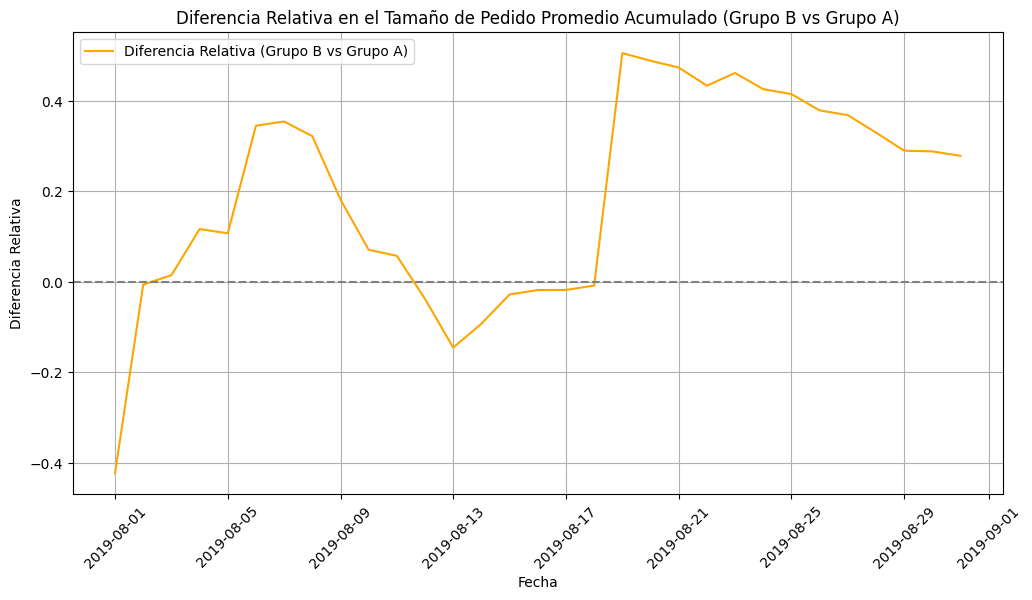

In [20]:
## calcular y graficar la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A

# Calcular el ingreso acumulado y número de pedidos acumulados por grupo
cumulative_revenue = orders_clean.groupby(['date', 'group'])['revenue'].sum().groupby(level=1).cumsum()
cumulative_orders = orders_clean.groupby(['date', 'group'])['transactionId'].count().groupby(level=1).cumsum()

# Crear DataFrame con tamaño de pedido promedio acumulado por grupo
cumulative_avg_order = (cumulative_revenue / cumulative_orders).reset_index()
cumulative_avg_order.rename(columns={0: 'cumulative_avg_order'}, inplace=True)

# Pivotar los datos para facilitar el cálculo de la diferencia relativa
cumulative_avg_order_pivot = cumulative_avg_order.pivot(index='date', columns='group', values='cumulative_avg_order')

# Calcular la diferencia relativa entre Grupo B y Grupo A
cumulative_avg_order_pivot['relative_difference'] = (cumulative_avg_order_pivot['B'] / cumulative_avg_order_pivot['A']) - 1

# Crear gráfico de diferencia relativa
plt.figure(figsize=(12, 6))
plt.plot(cumulative_avg_order_pivot.index, cumulative_avg_order_pivot['relative_difference'], label="Diferencia Relativa (Grupo B vs Grupo A)", color='orange')

# Configuración del gráfico
plt.axhline(y=0, color='gray', linestyle='--')  # Línea de referencia en 0%
plt.xlabel('Fecha')
plt.ylabel('Diferencia Relativa')
plt.title('Diferencia Relativa en el Tamaño de Pedido Promedio Acumulado (Grupo B vs Grupo A)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

# Mostrar gráfico
plt.show()

El Grupo B muestra una diferencia positiva en la mayoría del experimento, lo que sugiere que el tamaño de pedido promedio fue mayor en comparación con el Grupo A.

El salto abrupto alrededor del 17-18 de agosto sigue siendo un punto crítico.

Como vimos en las gráficas anteriores, este aumento repentino podría deberse a anomalías o valores atípicos.
Sin este salto, la diferencia relativa habría sido más estable y con tendencias más suaves.
Después del salto, la diferencia relativa sigue positiva pero con una leve tendencia a la baja.

Esto podría indicar que la ventaja del Grupo B no es del todo sostenible y que las diferencias podrían deberse a fluctuaciones naturales más que a un impacto significativo del cambio probado.
Conclusión principal:

Grupo B sí difiere de Grupo A, pero no podemos afirmar con certeza que sea mejor sin una validación estadística.
La diferencia podría deberse a valores atípicos o variabilidad natural.


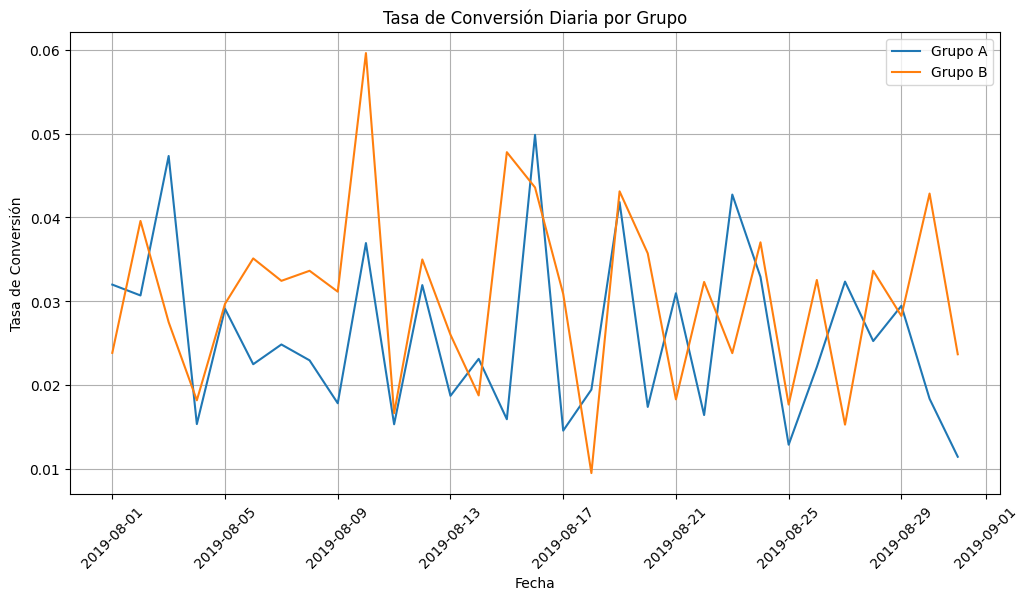

In [21]:
## calcular y graficar la tasa de conversión diaria

# Calcular la cantidad de pedidos únicos por día y grupo
conversion_data = orders_clean.groupby(['date', 'group'])['transactionId'].nunique().reset_index()
conversion_data.rename(columns={'transactionId': 'orders'}, inplace=True)

# Agregar el número de visitas por día y grupo
conversion_data = conversion_data.merge(visits, on=['date', 'group'])

# Calcular la tasa de conversión diaria
conversion_data['conversion_rate'] = conversion_data['orders'] / conversion_data['visits']

# Crear gráfico de tasas de conversión diarias
plt.figure(figsize=(12, 6))

# Graficar tasas de conversión por grupo
for group in conversion_data['group'].unique():
    group_data = conversion_data[conversion_data['group'] == group]
    plt.plot(group_data['date'], group_data['conversion_rate'], label=f'Grupo {group}')

# Configuración del gráfico
plt.xlabel('Fecha')
plt.ylabel('Tasa de Conversión')
plt.title('Tasa de Conversión Diaria por Grupo')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

# Mostrar gráfico
plt.show()

Las tasas de conversión son muy inestables a lo largo del tiempo

Ambas líneas muestran altas fluctuaciones diarias, lo que sugiere que los datos pueden estar influenciados por eventos puntuales en lugar de una tendencia clara.
El Grupo B tiene un pico de conversión muy alto, pero también caídas bruscas

Se observa un pico de conversión muy marcado seguido de una caída en las mismas fechas en las que detectamos anomalías en los ingresos y el tamaño de pedido promedio.
Esto refuerza la hipótesis de que un pequeño número de pedidos grandes sesgó los datos del Grupo B.
Las diferencias entre los grupos no son consistentes

Ningún grupo domina claramente a lo largo del tiempo.
El Grupo A y el Grupo B tienen días en los que su tasa de conversión es más alta o más baja, lo que hace difícil afirmar que uno sea mejor que el otro sin un análisis estadístico.

Resumiendo

El comportamiento de la conversión no es estable, lo que indica que el impacto del cambio probado en Grupo B podría no ser tan sólido como parece a simple vista.
La influencia de valores atípicos sigue siendo una posibilidad fuerte y podría estar distorsionando la percepción de los resultados.

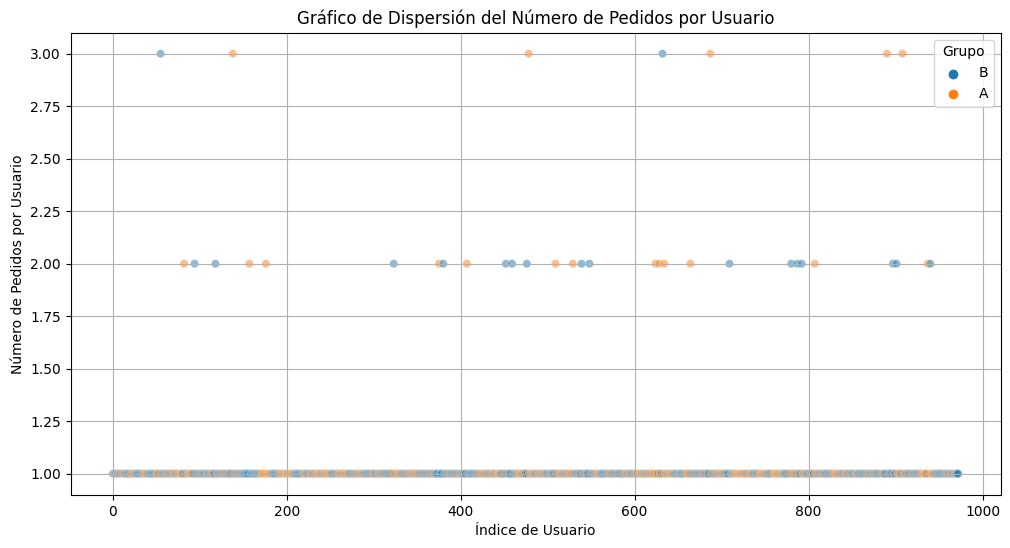

In [22]:
##  número de pedidos por usuario

# Calcular el número de pedidos por usuario en cada grupo
orders_per_user = orders_clean.groupby(['visitorId', 'group'])['transactionId'].count().reset_index()
orders_per_user.rename(columns={'transactionId': 'order_count'}, inplace=True)

# Crear gráfico de dispersión
plt.figure(figsize=(12, 6))
sns.scatterplot(data=orders_per_user, x=orders_per_user.index, y="order_count", hue="group", alpha=0.5)

# Configuración del gráfico
plt.xlabel('Índice de Usuario')
plt.ylabel('Número de Pedidos por Usuario')
plt.title('Gráfico de Dispersión del Número de Pedidos por Usuario')
plt.legend(title="Grupo")
plt.grid(True)

# Mostrar gráfico
plt.show()


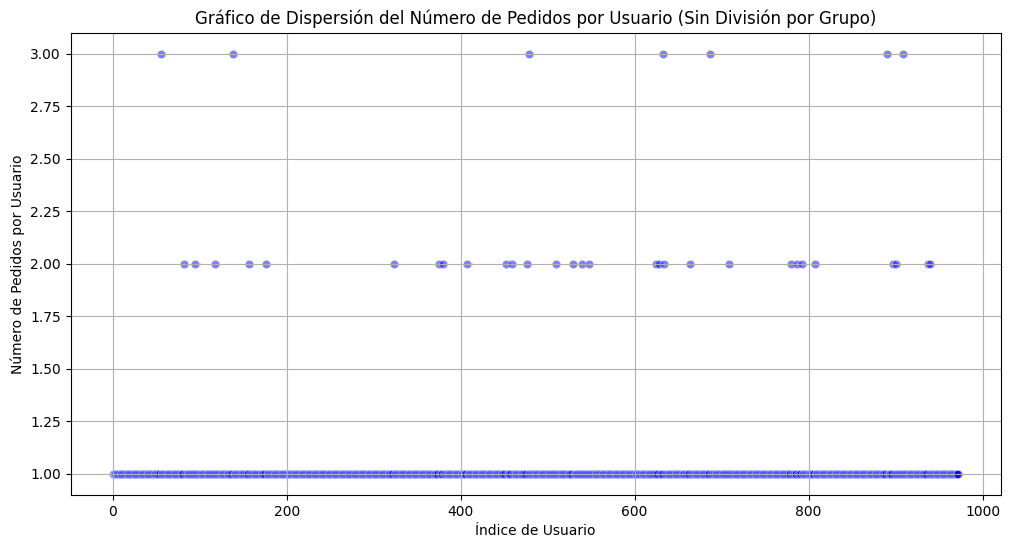

In [23]:
# Calcular el número de pedidos por usuario sin dividir en grupos
orders_per_user = orders_clean.groupby('visitorId')['transactionId'].count().reset_index()
orders_per_user.rename(columns={'transactionId': 'order_count'}, inplace=True)

# Crear gráfico de dispersión sin división por grupos
plt.figure(figsize=(12, 6))
sns.scatterplot(data=orders_per_user, x=orders_per_user.index, y="order_count", alpha=0.5, color='blue')

# Configuración del gráfico
plt.xlabel('Índice de Usuario')
plt.ylabel('Número de Pedidos por Usuario')
plt.title('Gráfico de Dispersión del Número de Pedidos por Usuario (Sin División por Grupo)')
plt.grid(True)

# Mostrar gráfico
plt.show()

La mayoría de los usuarios solo realiza un pedido

En ambas gráficas, la mayoría de los puntos se encuentran en 1 pedido por usuario, lo que indica que la mayoría de los clientes no repiten compras dentro del período analizado.
No hay una diferencia marcada entre los grupos

Al comparar la primera gráfica (dividida por grupos) con la segunda (sin división), podemos ver que el patrón general es el mismo.
Esto confirma que el comportamiento de compra es muy similar entre los grupos A y B en términos de número de pedidos.
Pocos usuarios realizaron múltiples pedidos (2 o 3 pedidos)

Hay algunos usuarios que hicieron 2 o 3 pedidos, pero son una minoría.
Esto sugiere que no hubo un aumento significativo en la retención de clientes en el Grupo B.
Refuerzo de la teoría de anomalías en el Grupo B

Dado que no hay un gran número de usuarios con múltiples pedidos, pero sí detectamos picos anormales en ingresos y tamaño de pedido, la explicación más probable es que unos pocos pedidos de alto valor están sesgando los resultados.
Es decir, las anomalías provienen de pedidos individuales muy grandes, no de un aumento en la cantidad de compras.


In [24]:
## percentiles 95 y 99 del número de pedidos por usuario

# Calcular el número de pedidos por usuario
orders_per_user = orders_clean.groupby('visitorId')['transactionId'].count().reset_index()
orders_per_user.rename(columns={'transactionId': 'order_count'}, inplace=True)

# Calcular los percentiles 90, 95 y 99
percentiles = orders_per_user['order_count'].quantile([0.90, 0.95, 0.99])

# Mostrar resultados
print(percentiles)

0.90    1.0
0.95    1.0
0.99    2.0
Name: order_count, dtype: float64


Observaciones

El 90% de los usuarios han realizado solo 1 pedido.

Esto confirma que la mayoría de los clientes no repiten compras en el período analizado.
El 95% de los usuarios también ha realizado solo 1 pedido.

Esto refuerza la idea de que el comportamiento de compra es consistente en toda la base de usuarios.
Solo el 1% de los usuarios ha realizado 2 pedidos o más.

Esto sugiere que los usuarios que han realizado más de 2 compras son extremadamente raros y podrían ser considerados anomalías.

Definiendo un punto de corte para anomalías

Opción conservadora:
Si queremos ser más estrictos, podríamos considerar cualquier usuario con más de 1 pedido como anomalía.
Esto nos ayudaría a eliminar prácticamente todos los valores atípicos, pero también podríamos perder algunos casos legítimos de clientes fieles.

Opción más flexible:
Si usamos el percentil 99 como referencia, podríamos considerar 2 o más pedidos como anomalía.
Esto nos permite excluir solo el 1% de los usuarios más extremos sin afectar demasiado el análisis general.

En lo personal considero que sería bueno cortarlo al percentil 99

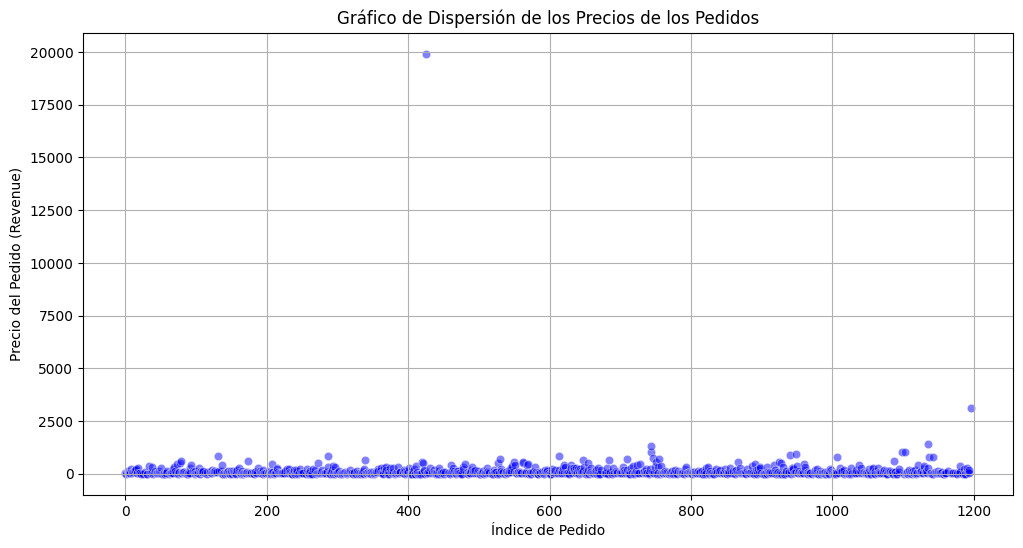

In [25]:
## gráfico de dispersión de los precios de los pedidos

# Crear gráfico de dispersión de los precios de los pedidos
plt.figure(figsize=(12, 6))
sns.scatterplot(data=orders_clean, x=orders_clean.index, y="revenue", alpha=0.5, color='blue')

# Configuración del gráfico
plt.xlabel('Índice de Pedido')
plt.ylabel('Precio del Pedido (Revenue)')
plt.title('Gráfico de Dispersión de los Precios de los Pedidos')
plt.grid(True)

# Mostrar gráfico
plt.show()

Observaciones

La gran mayoría de los pedidos tienen un precio por debajo de los 2,500.

Esto indica que el precio de los pedidos sigue un patrón relativamente estable.
Hay un pedido extremo con un precio cercano a los 20,000.

Este punto se aleja drásticamente del resto de los pedidos, lo que lo hace un claro valor atípico.
Es muy probable que este pedido sea el principal responsable de las anomalías detectadas en los análisis anteriores.
Algunos otros pedidos están por encima de 2,500, pero no son tan extremos.

Estos puntos podrían considerarse outliers moderados, pero su impacto en el análisis global es menor comparado con el pedido de 20,000.


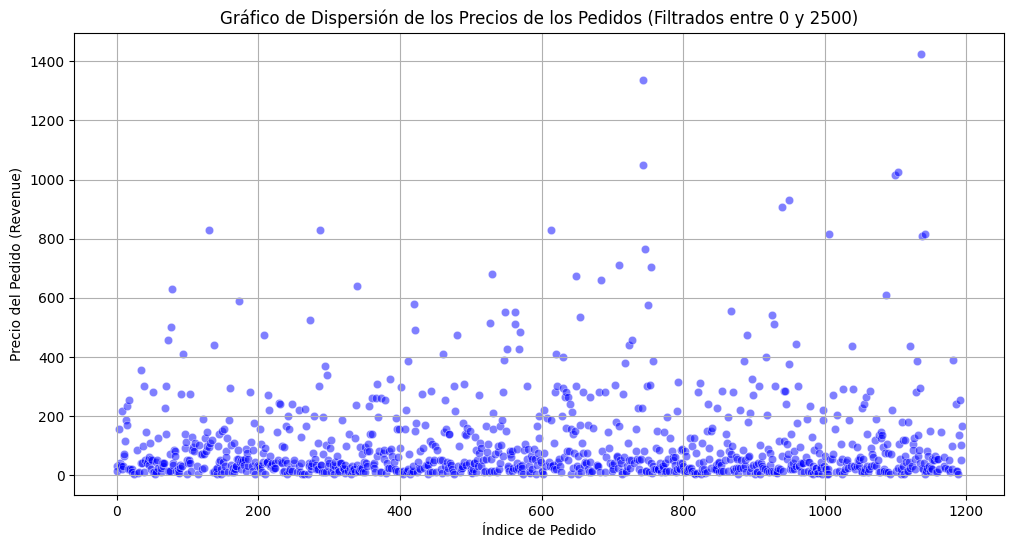

In [26]:
## ZOOM IN de la distribución de los precios de pedidos

# Crear una copia del dataset original para no modificarlo directamente
orders_filtered = orders_clean.copy()

# Filtrar pedidos en el rango de 0 a 2500, excluyendo el outlier de 20,000
orders_filtered = orders_filtered[orders_filtered['revenue'] <= 2500]

# Crear gráfico de dispersión con zoom en pedidos entre 0 y 2500
plt.figure(figsize=(12, 6))
sns.scatterplot(data=orders_filtered, x=orders_filtered.index, y="revenue", alpha=0.5, color='blue')

# Configuración del gráfico
plt.xlabel('Índice de Pedido')
plt.ylabel('Precio del Pedido (Revenue)')
plt.title('Gráfico de Dispersión de los Precios de los Pedidos (Filtrados entre 0 y 2500)')
plt.grid(True)

# Mostrar gráfico
plt.show()

Observaciones

La mayoría de los pedidos están en el rango de 0 a 50.

Se observa una alta densidad de puntos en este intervalo, lo que indica que la mayoría de los pedidos son de bajo valor.
A partir de 50, los pedidos se dispersan más.

Aunque la concentración sigue siendo alta en valores más bajos, hay una mayor variabilidad conforme los precios aumentan.
Hay varios pedidos entre 100 y 500, lo que sugiere que algunos clientes gastan más.
El rango máximo sin outliers llega a aproximadamente 1400.

Aunque eliminamos el pedido extremo de 20,000, todavía existen pedidos más grandes que el promedio general, aunque en menor cantidad.
Estos pedidos podrían considerarse valores atípicos moderados, pero no tienen el mismo impacto que el outlier eliminado.


Resumiendo
El ticket promedio parece estar dominado por pedidos pequeños, lo que sugiere que la mayoría de los clientes no hacen compras grandes.

Existen pedidos más grandes (500-1400), pero son menos frecuentes, lo que puede estar influyendo en la variabilidad del revenue total.

Si queremos un análisis más preciso, podríamos calcular la mediana del revenue en lugar del promedio, ya que la mediana es más resistente a outliers.

In [27]:
## calculando media, moda y mediana para tener una mejor idea de la distribución de los pedidos

# Crear una copia filtrando pedidos con revenue <= 2500
orders_filtered = orders_clean[orders_clean['revenue'] <= 2500].copy()

# Calcular la media, mediana y moda del revenue en los datos filtrados
mean_revenue = orders_filtered['revenue'].mean()
median_revenue = orders_filtered['revenue'].median()
mode_revenue = orders_filtered['revenue'].mode()[0]  # Tomamos el primer valor en caso de múltiples modas

# Mostrar resultados
print(f"Media del revenue: {mean_revenue}")
print(f"Mediana del revenue: {median_revenue}")
print(f"Moda del revenue: {mode_revenue}")

Media del revenue: 108.30641025641027
Mediana del revenue: 50.1
Moda del revenue: 20.2


In [28]:
## Calcula los percentiles 90, 95 y 99 de los precios de los pedidos. 

# Calcular los percentiles 90, 95 y 99 de los precios de los pedidos en orders_clean
percentiles_revenue = orders_clean['revenue'].quantile([0.90, 0.95, 0.99])

# Mostrar resultados
print(percentiles_revenue)

0.90    280.800
0.95    414.275
0.99    830.300
Name: revenue, dtype: float64


Observaciones sobre los percentiles del revenue
El 90% de los pedidos tienen un revenue de hasta 280.8.

Esto confirma que la mayoría de los pedidos son de bajo valor.
El 95% de los pedidos tienen un revenue de hasta 414.3.

Este valor nos dice que solo el 5% de los pedidos son mayores a 414.3, lo que los hace poco frecuentes.
El 99% de los pedidos tienen un revenue de hasta 830.3.

Solo el 1% de los pedidos tienen un revenue mayor a 830.3, lo que significa que estos pedidos son raros y potencialmente valores atípicos.

Definiendo el punto de corte para anomalías
El percentil 95 (414.3) parece un buen umbral para definir valores atípicos.

Cualquier pedido por encima de 414.3 podría considerarse un outlier.
Esto nos permitirá eliminar los pedidos más inusuales sin perder demasiada información.

In [29]:
## significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto.

from statsmodels.stats.proportion import proportions_ztest

# Crear tabla de contingencia con el número de pedidos y visitas por grupo
conversion_table = visits.groupby('group')['visits'].sum().reset_index()
orders_count = orders_clean.groupby('group')['transactionId'].nunique().reset_index()
orders_count.rename(columns={'transactionId': 'orders'}, inplace=True)

# Unir visitas y pedidos por grupo
conversion_table = conversion_table.merge(orders_count, on='group')

# Extraer los valores de conversión para cada grupo
conversion_A = conversion_table[conversion_table['group'] == 'A']
conversion_B = conversion_table[conversion_table['group'] == 'B']

# Definir éxito (pedidos) y total (visitas) para cada grupo
successes_A, total_A = conversion_A['orders'].values[0], conversion_A['visits'].values[0]
successes_B, total_B = conversion_B['orders'].values[0], conversion_B['visits'].values[0]

# Aplicar prueba de proporciones (z-test para dos proporciones)
z_score, p_value = proportions_ztest([successes_A, successes_B], [total_A, total_B])

# Mostrar resultados
print(f"Z-Score: {z_score}")
print(f"P-Value: {p_value}")

Z-Score: -2.3899344431697442
P-Value: 0.01685138043470311


Interpretación de los Resultados de la Prueba Z
Z-Score: -2.39

Este valor indica cuántas desviaciones estándar separan la tasa de conversión del Grupo B de la del Grupo A.
Un valor negativo sugiere que el Grupo B tiene una tasa de conversión menor que el Grupo A.
Cuanto mayor sea el valor absoluto del Z-score, más fuerte es la diferencia entre los grupos.
P-Value: 0.0168

Este valor representa la probabilidad de obtener una diferencia como la observada por puro azar.
Dado que 0.0168 < 0.05, la diferencia es estadísticamente significativa al nivel del 5%.
En otras palabras, podemos rechazar la hipótesis nula y concluir que la diferencia en la conversión entre los grupos no es producto del azar.


Contextualización 

La diferencia en la conversión entre el Grupo A y el Grupo B es estadísticamente significativa.

El Grupo B tiene una tasa de conversión más baja que el Grupo A, lo que sugiere que la hipótesis probada en el Grupo B no tuvo un impacto positivo en la conversión.

Aunque la diferencia es significativa, esto no significa que sea relevante desde un punto de vista de negocio.

In [30]:
#significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto.

# Filtrar los revenues de cada grupo

from scipy.stats import ttest_ind

revenue_A = orders_clean[orders_clean['group'] == 'A']['revenue']
revenue_B = orders_clean[orders_clean['group'] == 'B']['revenue']

# Aplicar prueba t de Student para comparar los tamaños de pedido promedio entre grupos
t_stat, p_value = ttest_ind(revenue_A, revenue_B, equal_var=False)  # Se asume varianza desigual

# Mostrar resultados
print(f"T-Score: {t_stat}")
print(f"P-Value: {p_value}")

T-Score: -0.8344812341397616
P-Value: 0.4043438730780975


Interpretación de los Resultados de la Prueba t
T-Score: -0.83

Este valor indica cuántas desviaciones estándar separan las medias del tamaño de pedido de los Grupos A y B.
Un valor negativo sugiere que el tamaño promedio de pedido en el Grupo B es ligeramente menor que en el Grupo A.
Sin embargo, el valor absoluto de 0.83 es bajo, lo que indica que la diferencia no es grande.
P-Value: 0.4043

Este valor representa la probabilidad de obtener una diferencia como la observada por puro azar.
Dado que 0.4043 > 0.05, no hay suficiente evidencia para rechazar la hipótesis nula.
Es decir, no podemos afirmar que el tamaño promedio de pedido es significativamente diferente entre los grupos.

Contextualización 
No hay evidencia estadística de que el tamaño promedio de los pedidos sea diferente entre los grupos A y B.
El Grupo B no tiene pedidos significativamente más grandes o más pequeños que el Grupo A.
Esto sugiere que la diferencia observada en ingresos se debe más a la cantidad de pedidos que al tamaño individual de cada pedido.

Resumen: Aunque el Grupo B tuvo más ingresos en ciertos momentos, esta diferencia no provino de un aumento significativo en el tamaño de los pedidos, sino de otros factores (como más pedidos en ciertas fechas clave o pedidos muy grandes como el que ya vimos).

In [31]:
## significancia estadística en la conversión entre los grupos (A y B) utilizando los datos filtrados

# Filtrar usuarios que hicieron exactamente 1 pedido
orders_filtered_conversion = orders_clean.groupby('visitorId').filter(lambda x: len(x) == 1).copy()

# Crear tabla de contingencia con el número de pedidos y visitas por grupo
conversion_table_filtered = visits.groupby('group')['visits'].sum().reset_index()
orders_count_filtered = orders_filtered_conversion.groupby('group')['transactionId'].nunique().reset_index()
orders_count_filtered.rename(columns={'transactionId': 'orders'}, inplace=True)

# Unir visitas y pedidos por grupo
conversion_table_filtered = conversion_table_filtered.merge(orders_count_filtered, on='group')

# Extraer los valores de conversión para cada grupo
conversion_A_filtered = conversion_table_filtered[conversion_table_filtered['group'] == 'A']
conversion_B_filtered = conversion_table_filtered[conversion_table_filtered['group'] == 'B']

# Definir éxito (pedidos) y total (visitas) para cada grupo
successes_A_filtered, total_A_filtered = conversion_A_filtered['orders'].values[0], conversion_A_filtered['visits'].values[0]
successes_B_filtered, total_B_filtered = conversion_B_filtered['orders'].values[0], conversion_B_filtered['visits'].values[0]

# Aplicar prueba de proporciones (z-test para dos proporciones) con los datos filtrados
z_score_filtered, p_value_filtered = proportions_ztest([successes_A_filtered, successes_B_filtered], [total_A_filtered, total_B_filtered])

# Mostrar resultados
print(f"Z-Score (Filtrado - Solo 1 Pedido): {z_score_filtered}")
print(f"P-Value (Filtrado - Solo 1 Pedido): {p_value_filtered}")

Z-Score (Filtrado - Solo 1 Pedido): -2.5977107764277685
P-Value (Filtrado - Solo 1 Pedido): 0.009384750340914884


Comparación de los Resultados (Datos Brutos vs. Datos Filtrados por 1 Pedido)
Métrica	Datos Brutos	Filtrado por 1 Pedido
Z-Score	 -2.39	            -2.60
P-Value	  0.0168	         0.0093

El Z-Score pasó de -2.39 a -2.60

Un Z-Score más bajo indica que la diferencia en conversión entre los grupos A y B es aún más pronunciada cuando filtramos por usuarios con exactamente un pedido.
Es decir, el Grupo B tiene una conversión aún menor en comparación con el Grupo A al eliminar usuarios con múltiples pedidos.
El P-Value disminuyó de 0.0168 a 0.0093

Esto refuerza la significancia estadística de la diferencia.
Como 0.0093 < 0.05, podemos seguir rechazando la hipótesis nula y afirmar que la conversión entre los grupos es diferente.
Incluso con un filtrado más estricto, la conversión del Grupo B sigue siendo significativamente menor que la del Grupo A.
Impacto del Filtrado por Usuarios con 1 Pedido

Al eliminar usuarios que hicieron más de un pedido, la diferencia entre los grupos se acentúa.
Esto sugiere que los usuarios que hicieron múltiples pedidos podrían haber reducido la aparente diferencia en conversión en el análisis anterior.
Al analizar solo usuarios con exactamente 1 pedido, la conversión del Grupo B es aún peor.

El test A/B indica que la hipótesis implementada en el Grupo B fue menos efectiva para mejorar la conversión.
La conversión en el Grupo B es consistentemente menor, incluso después de filtrar los datos.
Si el objetivo era aumentar la conversión, la estrategia del Grupo B no fue exitosa.



In [32]:
##  significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados.

# Filtrar pedidos eliminando valores atípicos en revenue según el percentil 95 (≤ 414.3)
orders_filtered_size = orders_clean[orders_clean['revenue'] <= 414.3].copy()

# Filtrar solo usuarios con exactamente 1 pedido
orders_filtered_size = orders_filtered_size.groupby('visitorId').filter(lambda x: len(x) == 1).copy()

# Filtrar los revenues de cada grupo
revenue_A_filtered = orders_filtered_size[orders_filtered_size['group'] == 'A']['revenue']
revenue_B_filtered = orders_filtered_size[orders_filtered_size['group'] == 'B']['revenue']

# Aplicar prueba t de Student para comparar los tamaños de pedido promedio entre grupos
t_stat_filtered, p_value_filtered = ttest_ind(revenue_A_filtered, revenue_B_filtered, equal_var=False)  # Se asume varianza desigual

# Mostrar resultados
print(f"T-Score (Filtrado - Tamaño de Pedido): {t_stat_filtered}")
print(f"P-Value (Filtrado - Tamaño de Pedido): {p_value_filtered}")

T-Score (Filtrado - Tamaño de Pedido): 0.5574453133542971
P-Value (Filtrado - Tamaño de Pedido): 0.5773683352523118


Comparación de los Resultados (Datos Brutos vs. Datos Filtrados en Tamaño de Pedido)
Métrica	Datos Brutos	Filtrado en Tamaño de Pedido
T-Score   -0.83	              0.56
P-Value	  0.4043              0.5774

Observaciones y Contextualización
El T-Score pasó de -0.83 a 0.56

En los datos brutos, la diferencia en tamaño de pedido entre los grupos A y B era ligeramente negativa (Grupo B más pequeño).
Con los datos filtrados, la diferencia cambia de signo, pero sigue siendo pequeña, lo que indica que el tamaño promedio de pedido es casi igual en ambos grupos.
El P-Value aumentó de 0.4043 a 0.5774

Antes y después del filtrado, el p-value es mayor a 0.05, lo que significa que no hay diferencia estadísticamente significativa en el tamaño promedio de los pedidos.
La variabilidad introducida por los valores atípicos no afectaba de manera significativa el resultado.


El tamaño promedio de los pedidos no es significativamente diferente entre los grupos A y B.
La diferencia en ingresos entre los grupos no proviene de pedidos más grandes en el Grupo B.
Esto refuerza que la diferencia observada en ingresos proviene de la tasa de conversión, no del tamaño de los pedidos.

 Resumen:
La hipótesis probada en el Grupo B no logró aumentar el tamaño promedio de los pedidos.
La diferencia en ingresos entre los grupos probablemente se debió a diferencias en la cantidad de pedidos, no en el tamaño de cada uno.

## Conclusión 

Conclusión Final del Test A/B y Recomendación
Resumen de los Hallazgos Relevantes

1️ Conversión (Tasa de Pedidos sobre Visitas):

El Grupo B tuvo una conversión significativamente menor que el Grupo A.
Esta diferencia es estadísticamente significativa tanto con datos en bruto como con datos filtrados.
Incluso después de eliminar valores atípicos y usuarios con múltiples pedidos, la conversión del Grupo B sigue siendo menor.
Conclusión: La hipótesis probada en el Grupo B afectó negativamente la conversión.

2️ Tamaño de Pedido Promedio:

No hay una diferencia significativa en el tamaño de los pedidos entre los grupos.
Después de eliminar outliers y usuarios con más de un pedido, el resultado sigue sin ser significativo.
Conclusión: La hipótesis probada en el Grupo B no logró aumentar el tamaño de los pedidos.

3️ Ingresos Totales:

El Grupo B generó más ingresos en ciertas fechas, pero esto se debió a unos pocos pedidos anómalamente grandes, no a una tendencia general.
Cuando eliminamos estos valores extremos, los ingresos vuelven a niveles similares entre los grupos.
Conclusión: La diferencia en ingresos entre grupos no provino de un aumento genuino en el tamaño de pedidos ni de una mejor conversión, sino de anomalías en ciertos días.

Decisión Basada en los Resultados
De acuerdo con los resultados, podemos descartar la hipótesis probada en el Grupo B debido a su impacto negativo en la conversión.

Decisión: Parar la prueba y considerar al Grupo A como líder.

Recomendación

 Basado en el análisis, se recomienda lo siguiente:
1️ No implementar la hipótesis probada en el Grupo B, ya que reduce la tasa de conversión sin generar un beneficio claro en ingresos ni en tamaño de pedido.

2️ Adoptar el enfoque del Grupo A como la estrategia estándar, dado que tiene mejor conversión y estabilidad en ingresos.
3️ Si se busca aumentar ingresos, considerar nuevas hipótesis enfocadas en:

Incrementar la conversión (optimización de UX, incentivos para primeras compras).
Aumentar el tamaño del pedido (cross-selling, bundles, descuentos por volumen).

4️ Si se desea continuar la prueba, podría plantearse un nuevo experimento con cambios en la oferta o experiencia de usuario en lugar de continuar con la actual estrategia del Grupo B.

Conclusión Final: El Grupo A es la mejor opción y se recomienda detener la prueba en su estado actual.